In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [70]:
df = pd.read_csv('nvidia_10yr_data.csv', parse_dates=['Date'])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
print(df)

           Date       Close        High         Low        Open     Volume
0    2015-01-02    0.483066    0.486665    0.475386    0.483066  113680000
1    2015-01-05    0.474906    0.484505    0.472747    0.483066  197952000
2    2015-01-06    0.460508    0.476106    0.460028    0.475626  197764000
3    2015-01-07    0.459308    0.467947    0.457868    0.463868  321808000
4    2015-01-08    0.476586    0.479466    0.464348    0.464588  283780000
...         ...         ...         ...         ...         ...        ...
2511 2024-12-24  140.197372  141.877094  138.627619  139.977407  105157000
2512 2024-12-26  139.907410  140.827275  137.707768  139.677451  116205600
2513 2024-12-27  136.987885  138.997570  134.688268  138.527645  170582600
2514 2024-12-30  137.467804  140.247354  133.998363  134.808230  167734700
2515 2024-12-31  134.268326  138.047730  133.808409  138.007728  155659200

[2516 rows x 6 columns]


In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2516 non-null   datetime64[ns]
 1   Close   2516 non-null   float64       
 2   High    2516 non-null   float64       
 3   Low     2516 non-null   float64       
 4   Open    2516 non-null   float64       
 5   Volume  2516 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
None


In [68]:
print(df['Date'].min())  # วันที่เก่าที่สุด
print(df['Date'].max())  # วันที่ใหม่ที่สุด
print(len(df))           # จำนวนแถวทั้งหมด

2015-01-02 00:00:00
2024-12-31 00:00:00
2516


In [71]:
print(df['Date'].dtype)  # ควรแสดง datetime64[ns]
print(df['Date'].head())  # ดูรูปแบบวันที่

datetime64[ns]
0   2015-01-02
1   2015-01-05
2   2015-01-06
3   2015-01-07
4   2015-01-08
Name: Date, dtype: datetime64[ns]


In [73]:
# ตรวจ missing
print(df.isnull().sum())

# ค่าที่ซ้ำกัน
df.duplicated().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


np.int64(0)

In [74]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,2516,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,2019-12-31 19:03:31.764706048,20.786881,21.164913,20.375351,20.789328,4.676480e+08
min,2015-01-02 00:00:00,0.459308,0.467947,0.454509,0.463628,5.244800e+07
25%,2017-07-02 06:00:00,3.545036,3.594863,3.449813,3.515635,3.055120e+08
50%,2020-01-01 00:00:00,6.482601,6.539911,6.338270,6.440887,4.151695e+08
75%,2022-06-30 06:00:00,21.228698,21.733422,20.806877,21.166934,5.640210e+08
max,2024-12-31 00:00:00,148.845734,152.854800,146.226298,149.315621,3.692928e+09
std,NaN,32.314417,32.916986,31.675142,32.351868,2.536131e+08


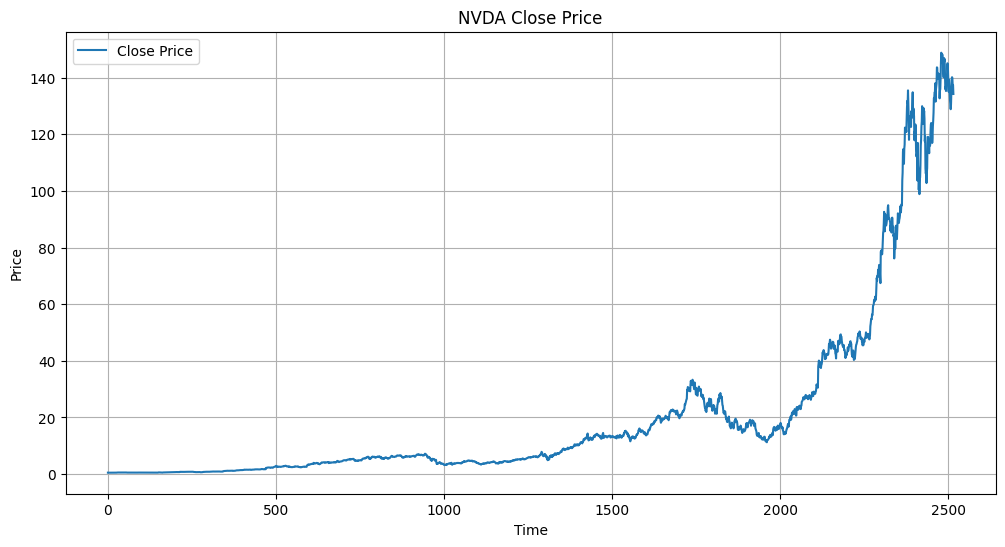

In [75]:
# ตรวจสอบกราฟแนวโน้ม
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price")
plt.title("NVDA Close Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.legend()


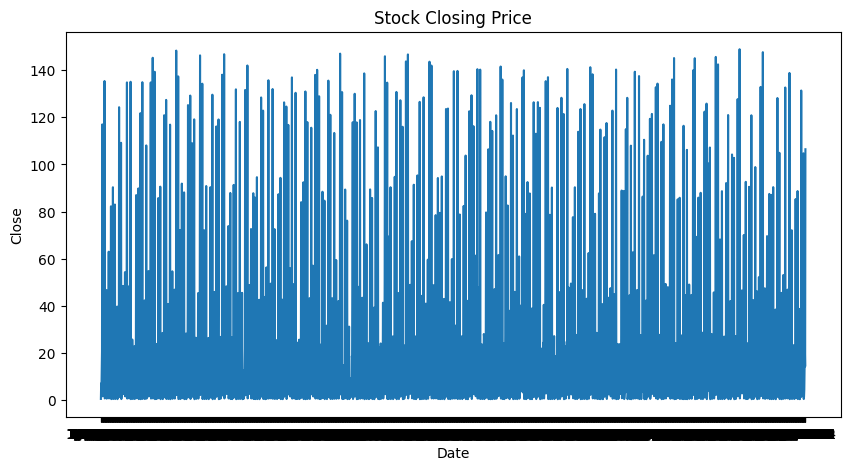

In [13]:
# Plot ราคาปิด
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Stock Closing Price')
plt.show()